In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob 

In [4]:
def raster_scan_connected_components(binary_image, connectivity=4):
    rows, cols = binary_image.shape
    labels = np.zeros_like(binary_image, dtype=int)
    label_counter = 1
    equivalence_table = {}

    # First pass
    for i in range(rows):
        for j in range(cols):
            if binary_image[i, j] == 1:  # Foreground pixel
                neighbors = []

                if connectivity == 4:
                    if i > 0: neighbors.append(labels[i-1, j])  # Top
                    if j > 0: neighbors.append(labels[i, j-1])  # Left
                elif connectivity == 8:
                    if i > 0: neighbors.append(labels[i-1, j])  # Top
                    if j > 0: neighbors.append(labels[i, j-1])  # Left
                    if i > 0 and j > 0: neighbors.append(labels[i-1, j-1])  # Top-left
                    if i > 0 and j < cols-1: neighbors.append(labels[i-1, j+1])  # Top-right

                neighbors = [label for label in neighbors if label > 0]  # Ignore background

                if not neighbors:
                    # New label
                    labels[i, j] = label_counter
                    equivalence_table[label_counter] = label_counter
                    label_counter += 1
                else:
                    # Assign the smallest label and record equivalences
                    smallest_label = min(neighbors)
                    labels[i, j] = smallest_label
                    for neighbor_label in neighbors:
                        equivalence_table[neighbor_label] = min(
                            equivalence_table[neighbor_label], smallest_label
                        )

    # Resolve equivalences
    for key, value in equivalence_table.items():
        while equivalence_table[value] != value:
            value = equivalence_table[value]
        equivalence_table[key] = value

    # Second pass
    for i in range(rows):
        for j in range(cols):
            if labels[i, j] > 0:
                labels[i, j] = equivalence_table[labels[i, j]]

    return labels

0.CC10.jpg


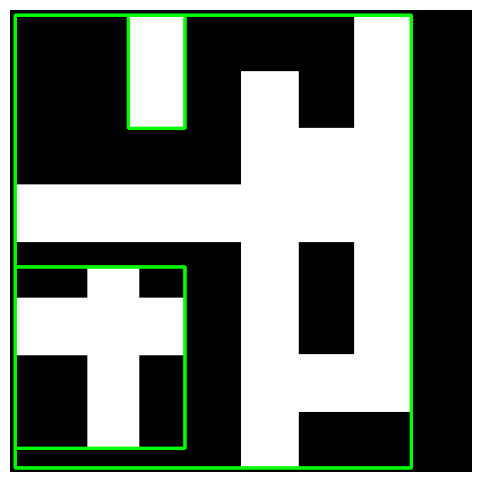

Processed image saved to: ./0.CC10.jpg-output.png
Error loading ./images\0.CC10.jpg
Error loading ./images\0.CC10.jpg
0.CC1.png


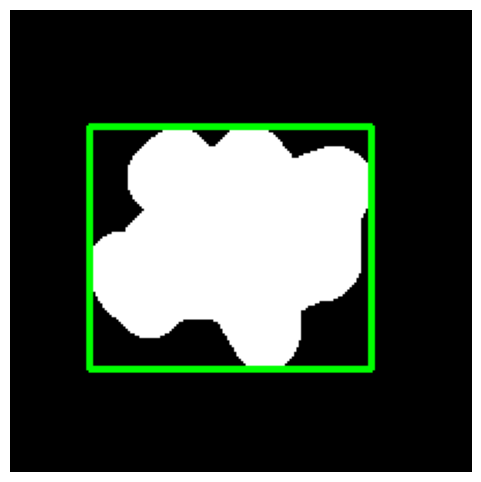

Processed image saved to: ./0.CC1.png-output.png
0.CC2.png


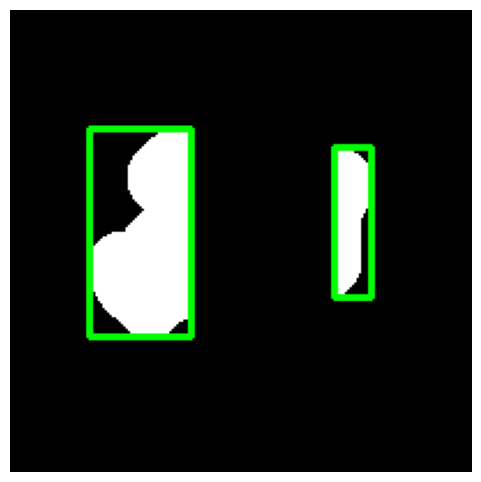

Processed image saved to: ./0.CC2.png-output.png
0.CC3.png


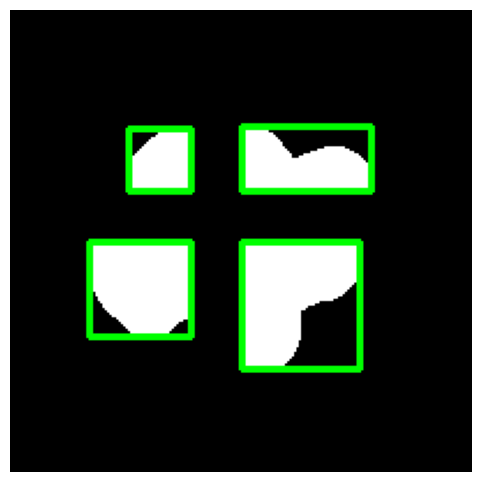

Processed image saved to: ./0.CC3.png-output.png
0.CC4.png


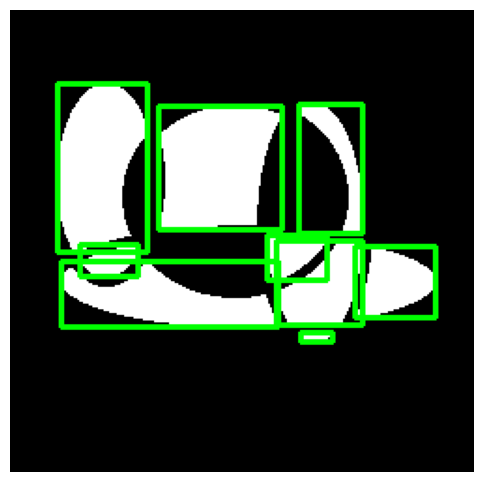

Processed image saved to: ./0.CC4.png-output.png
0.CC5.png


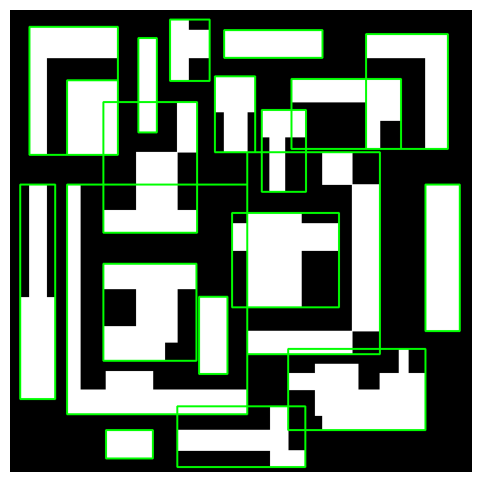

Processed image saved to: ./0.CC5.png-output.png
0.CC6.png


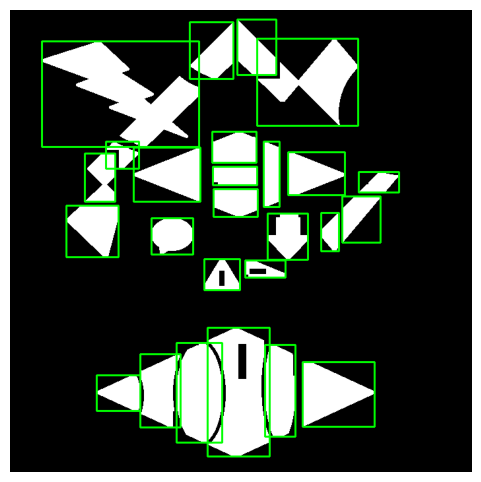

Processed image saved to: ./0.CC6.png-output.png
0.CC8.png


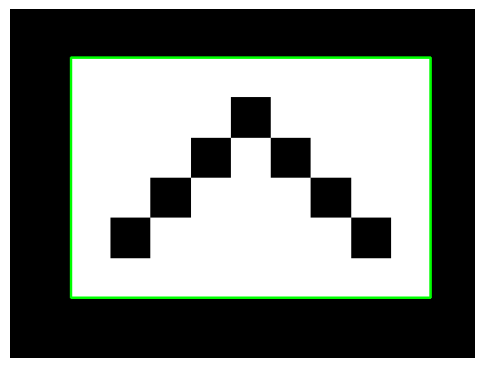

Processed image saved to: ./0.CC8.png-output.png
0.CC9.png


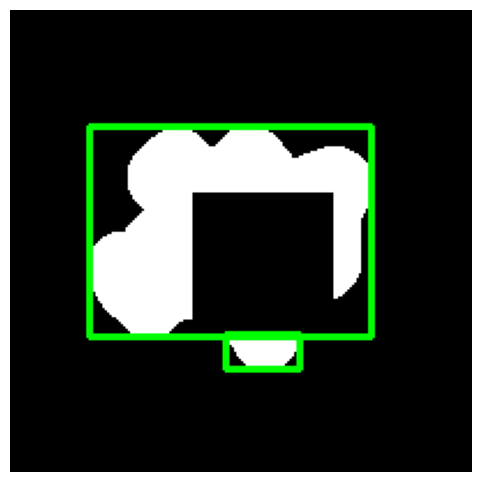

Processed image saved to: ./0.CC9.png-output.png
Error loading ./images\0.CC9.png
Error loading ./images\0.CC9.png
0.CC7.tif


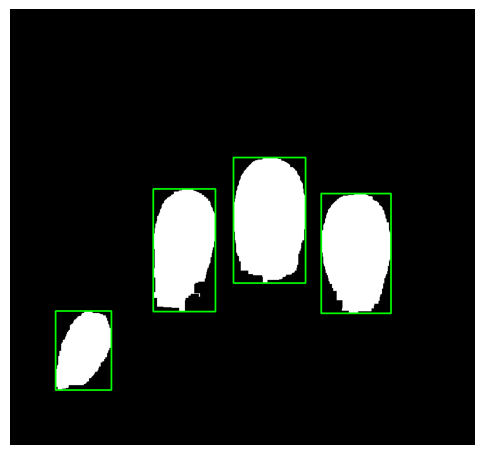

Processed image saved to: ./0.CC7.tif-output.png
Error loading ./images\0.CC7.tif


In [5]:
# Path to folder
folder_path = "./images"

# Supported image formats
image_extensions = ["jpg", "jpeg", "png", "bmp", "tif"]

# Loop through all image files
for ext in image_extensions:
    for image_path in glob.glob(os.path.join(folder_path, f"*.{ext}")):
        file_name = os.path.basename(image_path) 
        print(file_name)
        # Read the image
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Convert to binary image (handle both white and black objects)
        _, binary_image = cv2.threshold(image, 127, 1, cv2.THRESH_BINARY_INV if np.mean(image) > 127 else cv2.THRESH_BINARY)

        # Run connected components algorithm
        labels = raster_scan_connected_components(binary_image)

        # Find unique labels (excluding background)
        unique_labels = np.unique(labels)[1:]

        # Draw bounding boxes
        output_image = cv2.cvtColor(binary_image * 255, cv2.COLOR_GRAY2BGR)
        for label in unique_labels:
            y, x = np.where(labels == label)
            x_min, x_max = x.min(), x.max()
            y_min, y_max = y.min(), y.max()
            cv2.rectangle(output_image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

        # Display result
        plt.figure(figsize=(6, 6))
        plt.imshow(output_image)
        plt.axis("off")
        plt.show()
        output_path = f"./{file_name}-output.png"
        cv2.imwrite(output_path, output_image)
        print(f"Processed image saved to: {output_path}")
    else:
        print(f"Error loading {image_path}")